In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
%matplotlib inline
import cv2

import matplotlib.pyplot as plt
from pathlib import Path

import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms

from lib.data_loader import BlindDataset, Normalize, Rescale, RandomCrop, ToTensor, GaussianBlur, CircleCrop
from lib.models import EncoderCNN


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
INPUT_PATH = "./input"
TRAIN_LABELS = str(Path(INPUT_PATH, 'train.csv'))
TRAIN_IMAGES_DIR = str(Path(INPUT_PATH, 'train_images'))

In [3]:
IMG_SIZE = 2000
SAMPLE_IDX = 5

notrans_dataset = BlindDataset(TRAIN_LABELS, TRAIN_IMAGES_DIR)
notrans_sample = notrans_dataset.__getitem__(SAMPLE_IDX)['image']

data_transforms = transforms.Compose([Rescale((2000,2000)),CircleCrop(),GaussianBlur(),Normalize()])
dataset = BlindDataset(TRAIN_LABELS, TRAIN_IMAGES_DIR, data_transforms)
sample = dataset.__getitem__(SAMPLE_IDX)
sample_img = sample['image']
sample_label = sample['label']

255
255


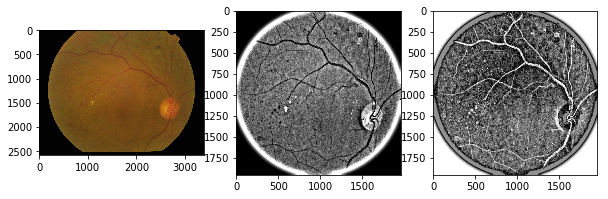

In [6]:
normalized = np.absolute(sample_img - 255/2)*2
normalized = normalized.astype(np.uint8)
print(normalized.max())
_, normalized = cv2.threshold(normalized, 10, 0, cv2.THRESH_TOZERO)
#normalized = cv2.adaptiveThreshold(normalized,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
print(normalized.max())

#normalized = cv2.threshold(normalized, 10, 0, cv2.THRESH_BINARY)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 3, 1)
plt.imshow(dataset.get_image(SAMPLE_IDX),  cmap='gray')

ax = fig.add_subplot(1, 3, 2)
plt.imshow(sample_img,  cmap='gray')

ax = fig.add_subplot(1, 3, 3)
plt.imshow(normalized, cmap='gray')


Text(0.5,1,'Label: 0')

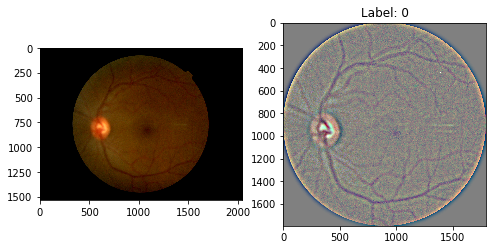

In [394]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 2, 1)
plt.imshow(notrans_sample,  cmap='gray')

ax = fig.add_subplot(1, 2, 2)
plt.imshow(sample_img, cmap='gray', vmin=0, vmax=1)
ax.set_title('Label: {}'.format(sample_label))

CPU times: user 1min 51s, sys: 624 ms, total: 1min 52s
Wall time: 1min 48s


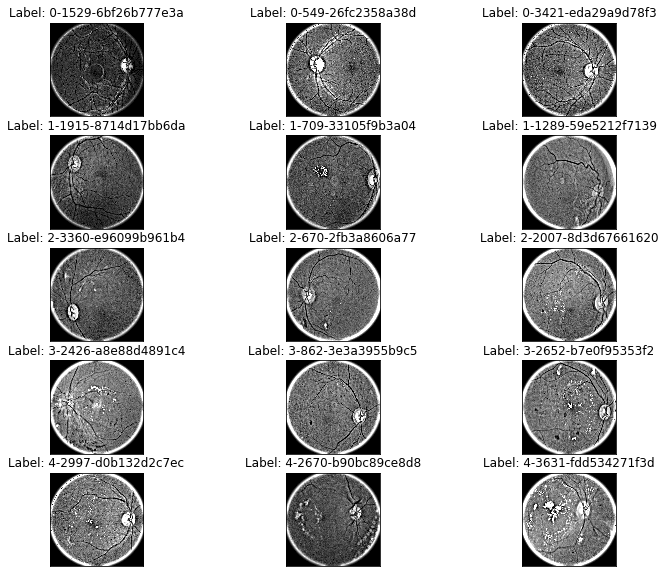

In [458]:
%%time
samples = dataset.peek()
NUM_IMAGES = 3
fig = plt.figure(figsize=(12, 10))
for class_id in range(len(samples)):
    for i, (idx, row) in enumerate(dataset.df.loc[dataset.df['diagnosis'] == class_id].sample(NUM_IMAGES).iterrows()):
        ax = fig.add_subplot(5, NUM_IMAGES, class_id * NUM_IMAGES + i + 1, xticks=[], yticks=[])
        sample = dataset.__getitem__(idx)
        plt.imshow(sample['image'], cmap='gray')
        ax.set_title('Label: %d-%d-%s' % (class_id, idx, row['id_code']) )

#for sample in samples:
    

In [502]:
# conv = EncoderCNN(5)
# print(conv)
import torchvision.models as models
conv = models.vgg16(pretrained=True)
num_features = conv.classifier[6].in_features
features = list(conv.classifier.children())[:-1]    #remove last layer
features.extend([nn.Linear()])
features.extend([nn.Linear(num_features, 5)]) # Add output layer 
conv.classifier = nn.Sequential(*features) # Replace the model classifier
print(conv)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [496]:
print(conv)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [490]:
features = list(conv.children())[:-1]
conv.classifier = nn.Sequential(*features) # Replace the model classifier
print(conv)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d